In [3]:
#imports
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy import integrate

import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from sklearn.metrics import r2_score
import random

In [4]:
#for getting yield/rate graphs
def change_coord(data, init, timespan):
    yield_list_E = []
    yield_list_A1 = []
    yield_list_A2 = []
    yield_list_tE = []
    for i in range(len(data[0])):
        yield_list_E.append((data[0][i])/init[0])
        yield_list_A1.append((data[1][i])/init[0])
        yield_list_A2.append((data[2][i])/init[0])
        yield_list_tE.append((data[3][i])/init[0])
    yield_lists = [yield_list_E,yield_list_A1,yield_list_A2,yield_list_tE]

    rate_list_E = []
    rate_list_A1 = []
    rate_list_A2 = []
    rate_list_tE = []
    for i in range(len(data[0])-1):
        rate_list_E.append((data[0][i+1]-data[0][i])/(timespan[i+1]-timespan[i]))
        rate_list_A1.append((data[1][i+1]-data[1][i])/(timespan[i+1]-timespan[i]))
        rate_list_A2.append((data[2][i+1]-data[2][i])/(timespan[i+1]-timespan[i]))
        rate_list_tE.append((data[3][i+1]-data[3][i])/(timespan[i+1]-timespan[i]))
    rate_lists = [rate_list_E,rate_list_A1,rate_list_A2,rate_list_tE]

    return yield_lists, rate_lists

In [5]:
# 74 = 98, 72 = 11, 71 = 121

In [6]:
#get the data
data = pd.read_excel('Pressure readings data.xls')

In [7]:
#check
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Hydrogenation yield,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Hydrogenation yield.1
0,Time,Tags500-.Tag 57,Tags500-.Tag 58,Tags500-.Tag 59,Tags500-.Tag 60,Tags500-.Tag 61,Tags500-.Tag 62,"time, min",70 deg,80 deg,...,110 deg,120 deg,"time, min",70 deg,80 deg,90 deg,100 deg,110 deg,120 deg,NaN
1,2022-01-25 16:54:30,51.2,45.29,45.39,45.42,45.37,45.59,0,0.04,0,...,0,0,0,0.007597,0,0,0,0,0,NaN
2,2022-01-25 16:54:40,51.23,45.32,45.43,45.4,45.36,45.58,0.166667,0.01,0,...,0.01,0.03,0.166667,0.001899,0,0.003589,0.00524,0.001701,0.004973,NaN
3,2022-01-25 16:54:50,51.24,45.31,45.41,45.42,45.34,45.61,0.333333,0,0,...,0.05,0.03,0.333333,0,0,0.007178,0.006986,0.008505,0.004973,NaN
4,2022-01-25 16:55:00,51.22,45.32,45.42,45.41,45.38,45.59,0.5,0.02,0,...,0.07,0.02,0.5,0.003799,0,0.005384,0.008733,0.011906,0.003315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,2022-01-26 09:33:50,50.59,50.04,49.64,50.94,51.41,50.69,999.333333,0.65,NaN,...,NaN,NaN,999.333333,0.123452,NaN,NaN,NaN,NaN,NaN,NaN
5998,2022-01-26 09:34:00,50.59,50.06,49.66,50.94,51.42,50.66,999.5,0.65,NaN,...,NaN,NaN,999.5,0.123452,NaN,NaN,NaN,NaN,NaN,NaN
5999,2022-01-26 09:34:10,50.61,50.05,49.66,50.92,51.41,50.69,999.666667,0.63,NaN,...,NaN,NaN,999.666667,0.119654,NaN,NaN,NaN,NaN,NaN,NaN
6000,2022-01-26 09:34:20,50.61,50.05,49.68,50.94,51.4,50.66,999.833333,0.63,NaN,...,NaN,NaN,999.833333,0.119654,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#clean the data
first = data.iloc[1:2,14:21]
convs = data.iloc[::10,14:21]
convs = convs.iloc[1:,:]
convs = pd.concat([first, convs], axis = 0)

In [9]:
convs = data.iloc[1:,14:21]

In [10]:
convs

,Hydrogenation yield,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
1,0,0.007597,0,0,0,0,0
2,0.166667,0.001899,0,0.003589,0.00524,0.001701,0.004973
3,0.333333,0,0,0.007178,0.006986,0.008505,0.004973
4,0.5,0.003799,0,0.005384,0.008733,0.011906,0.003315
5,0.666667,0.011396,0.007382,0.012562,0.019212,0.011906,0.003315
...,...,...,...,...,...,...,...
5997,999.333333,0.123452,NaN,NaN,NaN,NaN,NaN
5998,999.5,0.123452,NaN,NaN,NaN,NaN,NaN
5999,999.666667,0.119654,NaN,NaN,NaN,NaN,NaN
6000,999.833333,0.119654,NaN,NaN,NaN,NaN,NaN


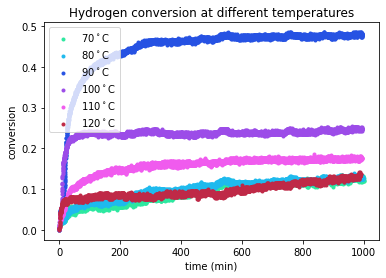

In [11]:
#check plot
plt.figure()
plt.scatter(convs.iloc[:,0],convs.iloc[:,1], label = '70$^\circ$C', s = 9,color = '#2DE8A0')
plt.scatter(convs.iloc[:,0],convs.iloc[:,2], label = '80$^\circ$C', s = 9,color = '#1EBAEE')
plt.scatter(convs.iloc[:,0],convs.iloc[:,3], label = '90$^\circ$C', s = 9, color = '#2652E3')
plt.scatter(convs.iloc[:,0],convs.iloc[:,4], label = '100$^\circ$C', s = 9, color = '#9C4CE8')
plt.scatter(convs.iloc[:,0],convs.iloc[:,5], label = '110$^\circ$C', s = 9, color = '#F05BEE')
plt.scatter(convs.iloc[:,0],convs.iloc[:,6], label = '120$^\circ$C', s = 9,color = '#BF2947')
plt.title('Hydrogen conversion at different temperatures')
plt.xlabel('time (min)')
plt.ylabel('conversion')
plt.legend()
# plt.savefig("C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/real_runs_varied.svg",dpi=300)

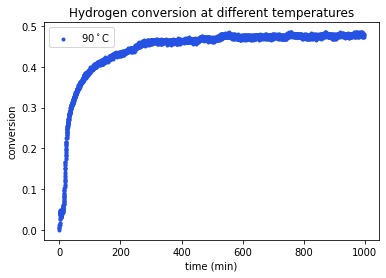

In [12]:
plt.scatter(convs.iloc[:,0],convs.iloc[:,3], label = '90$^\circ$C', s = 9, color = '#2652E3')
plt.title('Hydrogen conversion at different temperatures')
plt.xlabel('time (min)')
plt.ylabel('conversion')
plt.legend()
# plt.savefig("C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/single_real_run.svg",dpi=300)

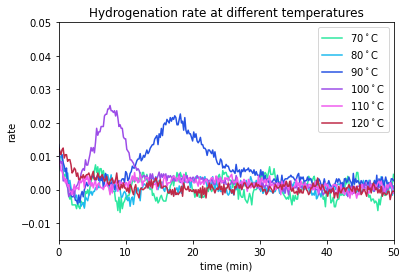

In [13]:
#plot rate graph
def conv_real(data):    
    rate_list = []
    data  = list(data)
    for i in range(len(data)-20):
            rate_list.append((data[i+20]-data[i])/(list(convs.iloc[:,0])[i+20]-(list(convs.iloc[:,0])[i])))
    return np.array(rate_list)
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,1]),color = '#2DE8A0',label = '70$^\circ$C')
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,2]),color = '#1EBAEE',label = '80$^\circ$C')
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,3]),color = '#2652E3',label = '90$^\circ$C')
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,4]),color = '#9C4CE8',label = '100$^\circ$C')
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,5]),color = '#F05BEE',label = '110$^\circ$C')
plt.plot(convs.iloc[:,0][:-20],conv_real(convs.iloc[:,6]),color = '#BF2947',label = '120$^\circ$C')
plt.title('Hydrogenation rate at different temperatures')
plt.xlabel('time (min)')
plt.ylabel('rate')
plt.xlim([0,50])
plt.ylim([-0.015,0.05])
plt.legend()
# plt.savefig("C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/real_rates_varied.svg",dpi=300)

In [29]:
#needed paramters
Ts = [343,353,363,373,383,393]
P = 50
KH= 1282
CH2 = P/KH
R= 8.314
timespan = list(convs.iloc[:,0])
init = [0.05,0,0,0,0.1,0,0,0]
time = timespan[-1]

In [30]:
#complex differential
def diff(x, init, constants):
    k1, k2, k3, k4, k5, k6 = constants['k1'],constants['k2'],constants['k3'],constants['k4'],constants['k5'],constants['k6']
    CE, CA1, CA2, CtE,Cprecat, Ccat, Ccatdead, H2uptake = init
    dEdt = -k1*CE*Cprecat - k2*CE*CA1 + k3*CtE*CA2
    dA1dt = k1*CE*Cprecat - k2*CE*CA1 + k3*CtE*CA2 + 2*k4*CtE*Cprecat
    dA2dt = k1*CE*Cprecat + k2*CE*CA1 - k3*CtE*CA2
    dtEdt = k2*CE*CA1 - k3*CtE*CA2 - k4*CtE*Cprecat
    dprecatdt = -k1*CE*Cprecat - k4*CtE*Cprecat + k5*Ccat*CH2 - k6*Cprecat
    dcatdt = k1*CE*Cprecat + k4*CtE*Cprecat - k5*Ccat*CH2
    dcatdeaddt = k6*Cprecat
    dH2uptakedt = k5*Ccat*CH2
    return dEdt, dA1dt, dA2dt, dtEdt, dprecatdt, dcatdt,dcatdeaddt, dH2uptakedt

In [31]:
#differential that drops all redundant constants
def diff(x, init, constants):
    k1, k2 = constants['k1'],constants['k2']
    CE, CA1, CA2, CtE,Cprecat, Ccat, Ccatdead, H2uptake = init
    dEdt = -k1*CE*Cprecat 
    dA1dt = k1*CE*Cprecat
    dA2dt = k1*CE*Cprecat
    dtEdt = 0
    dprecatdt = -k1*CE*Cprecat + Ccat*CH2 - k2*Cprecat
    dcatdt = k1*CE*Cprecat - Ccat*CH2
    dcatdeaddt = k2*Cprecat
    dH2uptakedt = Ccat*CH2
    return dEdt, dA1dt, dA2dt, dtEdt, dprecatdt, dcatdt,dcatdeaddt, dH2uptakedt

In [32]:
#function that converts kinetic parametes to rate constants
def get_lines(T,constants):
    A1, A2, A3, A4, A5, A6= constants['A1'],constants['A2'],constants['A3'],constants['A4'],constants['A5'],constants['A6']
    E1, E2, E3, E4, E5, E6= constants['E1'],constants['E2'],constants['E3'],constants['E4'],constants['E5'],constants['E6']
    tk1 = A1*np.exp(-E1/(R*T))
    tk2 = A2*np.exp(-E2/(R*T))
    tk3 = A3*np.exp(-E3/(R*T))
    tk4 = A4*np.exp(-E4/(R*T))
    tk5 = A5*np.exp(-E5/(R*T))
    tk6 = A6*np.exp(-E6/(R*T))
    ind_const= {'k1': tk1, 'k2': tk2, 'k3': tk3, 'k4': tk4, 'k5': tk5, 'k6': tk6}
    time = list(timespan)[-1]
    best_1 = integrate.solve_ivp(diff, [0,time], init, args = (ind_const,), t_eval = timespan)
    return best_1.y

In [33]:
#for the simpler system
def get_lines(T,constants):
    A1, A2= constants['A1'],constants['A2']
    E1, E2= constants['E1'],constants['E2']
    tk1 = A1*np.exp(-E1/(R*T))
    tk2 = A2*np.exp(-E2/(R*T))
    ind_const= {'k1': tk1, 'k2': tk2}
    time = list(timespan)[-1]
    print(ind_const)
    best_1 = integrate.solve_ivp(diff, [0,time], init, args = (ind_const,), t_eval = timespan)
    return best_1.y

In [36]:
# main workhorse of the script, guesses rate constants, and minimizes the residual of the outcome
def fit_sim(data, timespan,minim,num):
    time = list(timespan)[-1]
    max_score =1
    def residual(paras):

        """
        compute the residual between actual data and fitted data
        """
        subject = {}
        for i in range(2):
            subject[f'k{i+1}'] = paras[f'k{i+1}'].value

        
        sol_list = []
        
        sol = integrate.solve_ivp(diff, [0,time], init, args = (subject,), t_eval = timespan)
        score = r2_score(data,((sol.y[2]+sol.y[3])/(sol.y[0] + sol.y[2] + sol.y[3]*2)))

        


        print(score)
        return max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score

    

    params = Parameters()
    params.add('k1',value=0.01, min=minim[0], max=5)
    params.add('k2',value=0.01, min=minim[1], max=2)
#     for i in range(1):
#         params.add(f'k{i+2}',value=0.01, min=1e-10, max=10)
    


    results = minimize(residual, params, method='leastsq', max_nfev = 1000)  # leastsq nelder

    
    fin_sub = {}
    for i in range(2):
            fin_sub[f'k{i+1}'] = results.params[f'k{i+1}'].value
    
    data_fitted = integrate.solve_ivp(diff, [0,time], init, args = (fin_sub,), t_eval = timespan)
    sim = residual(results.params)[0]
    score = max_score - sim
    print(sim)

    plt.figure()
#     plt.plot(timespan,data_fitted.y[7])
    plt.plot(timespan,((data_fitted.y[2]+data_fitted.y[3])/(data_fitted.y[0] + data_fitted.y[2] + data_fitted.y[3]*2)), label = 'fit', color = '#2652E3')
    plt.scatter(timespan,data, s = 6,alpha=0.3, label = 'real', color = '#2652E3')
    plt.title('Algorithm fit on real data')
    plt.ylabel('Hydrogen conversion')
    plt.xlabel('time (min)')
    plt.legend()
    plt.savefig(f"C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/real_data_fit{num}.svg",dpi=300)
#     report_fit(results)
    
    return results.params, score

In [37]:
#for collecting all rate constant guessed
k1_lis = []
k2_lis =[]
k3_lis =[]
k4_lis =[]
k5_lis =[]
k6_lis =[]

0.5329167014589595
0.5329167014589595
0.5329167014589595
0.5329176200250336
0.5329160935644359
0.34675359969035835
0.6380615232673241
0.6380613242795343
0.6380615273273499
0.6002534618219104
0.6415088848614456
0.6415088924471198
0.6415087698919663
0.6448929660073424
0.6448927889514756
0.6448929564033719
0.6482276248781897
0.648227640507832
0.6482275044154047
0.6516027789153669
0.6516025930770913
0.6516027734171129
0.6549179760908439
0.6549179987689481
0.6549178507847502
0.6582850177788243
0.6582848245249686
0.6582850156712381
0.6615825197081844
0.6615825479543136
0.6615823904890643
0.6649601280308703
0.664959929117733
0.6649601283427025
0.668243586241474
0.6682436181894826
0.668243454208322
0.671594543089626
0.6715943406827752
0.6715945447034125
0.6748620325283533
0.6748620660871749
0.6748618990243906
0.6781981441286697
0.6781979405812448
0.6781981457780408
0.68144802063183
0.6814480535456615
0.6814478870326552
0.6847619538501191
0.6847617515405089
0.6847619542604753
0.6879899577558853

0.851878150355192
0.8518402384997905
0.8518955783239424
0.8518955820066932
0.8518955658442564
0.8519117751509659
0.8519117560176424
0.8519117748136605
0.8519271562430104
0.8519271612338019
0.8519271435471703
0.8519418198177107
0.8519417999831091
0.8519418202988152
0.8519557114225265
0.8519557178220091
0.85195569843895
0.8519689407954018
0.8519689201240965
0.8519689421463281
0.8519831832009888
0.851983188515523
0.8519831711914527
0.8519951583578811
0.851995139015681
0.8519951594146689
0.8520063422202024
0.8520063497701806
0.8520063294629713
0.852016820657993
0.8520167995067791
0.8520168230624809
0.8520312245156443
0.8520312169222007
0.8520312199359555
0.8520413323743287
0.8520413277029023
0.852041326449399
0.8520603776943605
0.8520603681412202
0.8520603746695831
0.8520674916551724
0.852067512276746
0.8520674736089874
0.8520999920781687
0.8520999831485907
0.852099989504044
0.8521102014382668
0.8521102077031956
0.8521101912727945
0.8521136561139484
0.8521136358631157
0.8521136599328577
0.

0.4326986805955467
0.4326986805955467
0.4326986805955467
0.4327000118955622
0.4326977960440377
0.6986754644677069
0.6986754399672223
0.6986754026320106
-3.6414036578500735
0.6871428616740934
0.7019441942104859
0.7019440205899351
0.701944225471089
0.7032302394602614
0.7032303280743164
0.7032301073098957
0.7075524419952157
0.7075523956403218
0.7075523936261534
0.7102178243602031
0.7102177509334135
0.7102177928428224
0.7150355354635493
0.7150355344074161
0.715035458838372
0.7052329590199571
0.7173120484344417
0.7173119225292701
0.7173120497104033
0.7195504737507661
0.7195504799509315
0.7195503926339883
0.7217998111770394
0.7217996910273096
0.7217998088911315
0.7240133421133055
0.7240133472880423
0.7240132616891792
0.7262427898065511
0.7262426689619935
0.7262427880396438
0.7284378000905051
0.7284378060371537
0.728437719277254
0.7306487502914232
0.7306486288810767
0.7306487489924862
0.7328233121198773
0.7328233188473771
0.7328232309573314
0.7350145222717535
0.7350144003218272
0.735014521467

0.8746512815132219
0.8746512834637776
0.8748581330242804
0.8748581262802907
0.8748581270794742
0.8752064862070826
0.8752064705733048
0.8752064872027077
0.8671220124318477
0.875223242075609
0.8752232512569863
0.8752232284462043
0.8752723977758301
0.8752723932362628
0.875272392413688
0.8753033512386259
0.8753033438136492
0.87530334775837
0.8753583673136746
0.8753583674226199
0.8753583596552184
0.8752615379104428
0.8753836758504658
0.8753836634913297
0.8753836757779451
0.8754066484865543
0.8754066515908342
0.87540663934304
0.8754315548784546
0.8754315428209295
0.8754315548925604
0.8754536570068074
0.8754536591644628
0.8754536486832712
0.8754748306805881
0.8754748178332146
0.8754748314285636
0.8754949957083661
0.875494999069195
0.8754949869294721
0.875516563490872
0.8755165514509916
0.8755165639999086
0.8755355177541202
0.8755355205918075
0.8755355095275347
0.8755536998474733
0.8755536870968532
0.8755537010235024
0.8755710160806611
0.8755710200005891
0.8755710074521488
0.8755902259232387
0

0.8760698939896762
0.8760698942366735
0.8760698935135661
0.8760699595787084
0.8760699593359839
0.8760699593943018
0.8760700075607234
0.8760700073300909
0.8760700073750184
0.8760701009158502
0.876070100678968
0.8760701007454825
0.8760702761223839
0.8760702759916572
0.8760702759127472
0.8760703224415002
0.8760703210363968
0.87607032302699
0.8760704744065603
0.8760704750908693
0.876070473764778
0.8760706087319905
0.876070608388622
0.8760706086984312
0.8760706199309833
0.876070620285871
0.876070619494796
0.8760706766803052
0.8760706765403348
0.8760706765377145
0.8760707090092064
0.8760707088067432
0.8760707089092128
0.8760707642710637
0.8760707643153361
0.876070764037039
0.8760705302186287
0.8760707847333178
0.876070784431245
0.8760707847067839
0.8760708041642855
0.876070804175943
0.8760708039567527
0.8760708229430668
0.8760708226366792
0.8760708229266918
0.8760708408907165
0.8760708409179778
0.876070840681466
0.8760708582449317
0.8760708579334386
0.8760708582388967
0.8760708748112597
0.87

0.9488575885533358
0.9488576061349301
0.9490737089991963
0.9490737373127776
0.9490736995236815
0.9492876514871336
0.949287656398938
0.9492876743614687
0.9494981781465984
0.9494982060430158
0.9494981687308867
0.9497048999999446
0.9497049047094177
0.949704922667012
0.9499076928475134
0.9499077205544737
0.9499076831838262
0.9501078641075683
0.9501078684682858
0.9501078867813099
0.9503041644007756
0.9503041919151141
0.9503041545048672
0.950497994599148
0.950497998620438
0.950498017277488
0.9506880529132915
0.9506880802361921
0.9506880427944815
0.9508757738259476
0.9508757775177903
0.9508757965055616
0.9510598209040316
0.9510598480370982
0.9510598105707364
0.951241656600783
0.9512416599728002
0.9512416792785192
0.9514199122945842
0.9514199392395412
0.9514199017547439
0.9515960772547388
0.9515960803161395
0.951596099927699
0.9517687517789402
0.9517687785375943
0.9517687410400842
0.9519394512137141
0.951939453973315
0.9519394738792429
0.9521067457165181
0.9521067722907459
0.952106734785797
0.

0.9625016073594008
0.9625206897070345
0.9625206969808385
0.9625206879314215
0.9625395424808268
0.9625395446757193
0.9625395479976186
0.9625581531460946
0.9625581603878486
0.9625581513042117
0.9625765355138889
0.9625765376205039
0.9625765410481142
0.9625946819122203
0.9625946891216324
0.9625946800061271
0.9626126065763779
0.9626126085967398
0.9626126121267419
0.9626303012141129
0.9626303083909431
0.9626302992457648
0.9626477804779556
0.9626477824140075
0.9626477860432504
0.9626650354707545
0.9626650426148099
0.9626650334420117
0.9626820812598585
0.9626820831134683
0.9626820868389542
0.9626989083486496
0.9626989154597783
0.9626989062612826
0.962715532217164
0.9627155339901284
0.9627155378090041
0.9627319427852097
0.9627319498632986
0.9627319406409084
0.9627481559428643
0.9627481576369161
0.9627481615464571
0.9627641610324169
0.9627641680773857
0.9627641588327956
0.9627799743497139
0.9627799759665238
0.9627799799641298
0.9627955846711377
0.9627955916829374
0.9627955824177401
0.96281100869

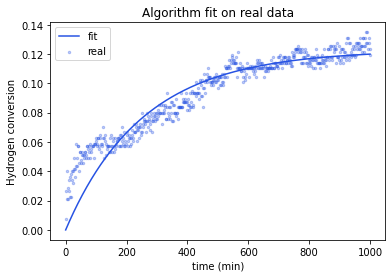

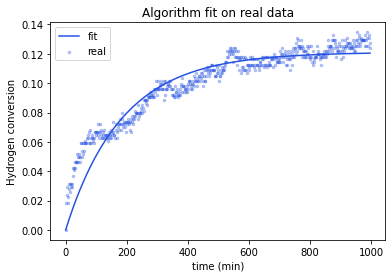

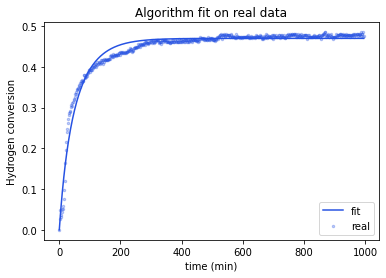

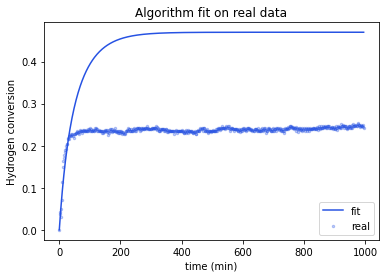

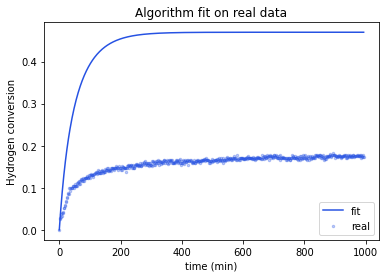

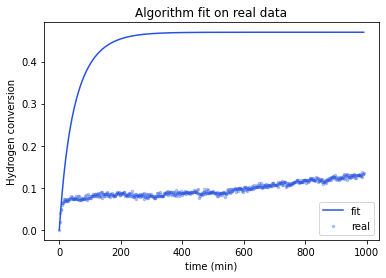

In [38]:
#guessing the rate constants
minim = [1e-10,1e-10]
for i in range(6):
    data = convs.iloc[:,i+1].dropna()
    timespan = convs.iloc[:,0][:len(data)]
    res = fit_sim(data, timespan, minim,i)
    minim = [res[0]['k1'], res[0]['k2']]
    k1_lis.append(res[0]['k1'].value)
    k2_lis.append(res[0]['k2'].value)
#     k3_lis.append(res[0]['k3'].value)
#     k4_lis.append(res[0]['k4'].value)
#     k5_lis.append(res[0]['k5'].value)
#     k6_lis.append(res[0]['k6'].value)

In [39]:
#check
print(k1_lis)
print(k2_lis)
# print(k4_lis)
# print(k6_lis)

[0.004892100924536029, 0.0067022933909289106, 0.1096879711891915, 0.1096879711891915, 0.1096879711891915, 0.1096879711891915]
[0.003736292270418301, 0.005190593823418313, 0.0172992457595464, 0.0172992457595464, 0.0172992457595464, 0.0172992457595464]


In [43]:
#needed manual adjustments
k2_lis[5] = 0.1672992457595464
k2_lis[4] = 0.0872992457595464
k2_lis[3] = 0.0572992457595464
k1_lis[5] = 0.1696879711891915
k1_lis[4] = 0.1696879711891915
k1_lis[3] = 0.1596879711891915

[-90394.43013802217, -91911.32923281414]
[364787147065.9864, 303952312159.7842]


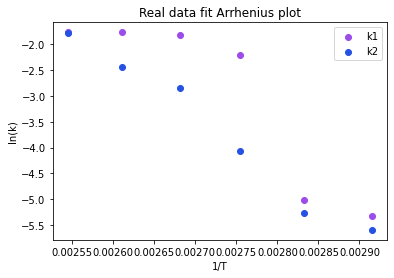

In [44]:
#check plot
colors = ['#9C4CE8','#2652E3']
k_lists = [k1_lis,k2_lis]#,k3_lis,k4_lis,k5_lis,k6_lis]
Eact_list = []
A_list = []
i = 1
for lis in k_lists:
    log_list = np.log(lis)
    reciprocal_list = 1/np.array(Ts)
    lin_model = np.polyfit(reciprocal_list,log_list,1)
    slope = lin_model[0]
    intercept = lin_model[1]
    Eact_list.append(slope*8.314)
    A_list.append(np.exp(intercept))
    plt.scatter(reciprocal_list,log_list, label = f'k{i}', color = colors[i-1])
    plt.title('Real data fit Arrhenius plot')
    plt.xlabel('1/T')
    plt.ylabel('ln(k)')
    plt.legend()
    i+=1
    plt.savefig("C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/arrhenius_plot.svg",dpi=300)
print(Eact_list)
print(A_list)

In [45]:
# main workhorse of the script, guesses kinetic constants, and minimizes the residual of the outcome
def fit_sim_full():
    max_score = 6
    
    pre_consts = []
    E_acts = []
    
    for i in range(2):
        pre_consts.append(f'A{i+1}')
        E_acts.append(f'E{i+1}')
        
    def residual(paras):

        """
        compute the residual between actual data and fitted data
        """
        
        subject = {}
        for pre_const in pre_consts:
            subject[pre_const] = paras[pre_const].value
        for E_act in E_acts:
            subject[E_act] = paras[E_act].value
        
        half = int(len(subject)/2)
        for i in range(half):
            val = subject[f'A{i+1}']*np.exp(-subject[f'E{i+1}']/(R*Ts[-1]))
            if val > 1:
                return max_score,max_score,max_score,max_score,max_score,max_score,max_score,max_score,max_score,max_score,max_score,max_score,
        
        
        score = 0
        for i in range(len(Ts)):
            lines = get_lines(Ts[i],subject)
            score += (r2_score(convs.iloc[:,i][:len(lines[0])], ((lines[2]+lines[3])/(lines[0] + lines[2] + lines[3]*2))))      
        

                                                                           
        print(score)
        return max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score,max_score-score


    params = Parameters()
    for i in range(len(pre_consts)):
        params.add(pre_consts[i],value=A_list[i], min=1e-20, max=1e25)
    for i in range(len(E_acts)):
        params.add(E_acts[i],value=-Eact_list[i], min=1000, max=400000000)

    results = minimize(residual, params, method='leastsq', max_nfev = 1000)  # leastsq nelder
    report_fit(results)
    
    sim = residual(results.params)[0]
    score = max_score - sim
    print(sim)
    
    fin_sub = {}
    for pre_const in pre_consts:
        fin_sub[pre_const] = results.params[pre_const].value
    for E_act in E_acts:
        fin_sub[E_act] = results.params[E_act].value
    
    for T in Ts:
        mock_run = get_lines(T,fin_sub)
        plt.plot(convs.iloc[:,0][:len(mock_run[0])],((mock_run[2]+mock_run[3])/(mock_run[0] + mock_run[2] + mock_run[3]*2)), label = T)
    
    

    plt.scatter(convs.iloc[:,0],convs.iloc[:,1], label = '70', s = 6,alpha=0.3)
    plt.scatter(convs.iloc[:,0],convs.iloc[:,2], label = '80', s = 6,alpha=0.3)
    plt.scatter(convs.iloc[:,0],convs.iloc[:,3], label = '90', s = 6,alpha=0.3)
#     plt.scatter(convs.iloc[:,0],convs.iloc[:,4], label = '100', s = 6,alpha=0.3)
#     plt.scatter(convs.iloc[:,0],convs.iloc[:,5], label = '110', s = 6,alpha=0.3)
#     plt.scatter(convs.iloc[:,0],convs.iloc[:,6], label = '120', s = 6,alpha=0.3)
    plt.legend()



#     print(residual(results.params)[0])
    
    return results.params, score

{'k1': 0.006244524715667987, 'k2': 0.003059858489996135}
{'k1': 0.015327936794627342, 'k2': 0.00762482601601272}
{'k1': 0.035808099694795356, 'k2': 0.01806804772806207}
{'k1': 0.07993192350054303, 'k2': 0.040879198314590096}
{'k1': 0.1710993425685881, 'k2': 0.08862923539583084}
{'k1': 0.3523348891345855, 'k2': 0.1847347513523769}
-36.72320283023766
{'k1': 0.006244524715667987, 'k2': 0.003059858489996135}
{'k1': 0.015327936794627342, 'k2': 0.00762482601601272}
{'k1': 0.035808099694795356, 'k2': 0.01806804772806207}
{'k1': 0.07993192350054303, 'k2': 0.040879198314590096}
{'k1': 0.1710993425685881, 'k2': 0.08862923539583084}
{'k1': 0.3523348891345855, 'k2': 0.1847347513523769}
-36.72320283023766
{'k1': 0.006244524715667987, 'k2': 0.003059858489996135}
{'k1': 0.015327936794627342, 'k2': 0.00762482601601272}
{'k1': 0.035808099694795356, 'k2': 0.01806804772806207}
{'k1': 0.07993192350054303, 'k2': 0.040879198314590096}
{'k1': 0.1710993425685881, 'k2': 0.08862923539583084}
{'k1': 0.3523348891

(Parameters([('A1',
              <Parameter 'A1', value=364708263589.36395, bounds=[1e-20:1e+25]>),
             ('A2',
              <Parameter 'A2', value=304201108747.2929, bounds=[1e-20:1e+25]>),
             ('E1',
              <Parameter 'E1', value=90394.43013801854, bounds=[1000:400000000]>),
             ('E2',
              <Parameter 'E2', value=91911.32923281673, bounds=[1000:400000000]>)]),
 -36.72320283023766)

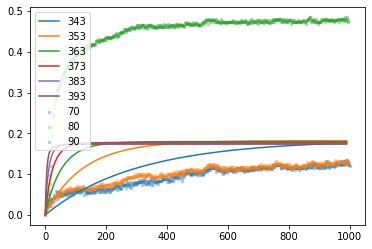

In [46]:
#result
fit_sim_full()

{'k1': 0.0010033880130320312, 'k2': 0.00040439703696633003}
{'k1': 0.002513031595939073, 'k2': 0.0010259533044051203}
{'k1': 0.005983543425692532, 'k2': 0.002472695626716617}


Text(0, 0.5, 'hydrogen conversion')

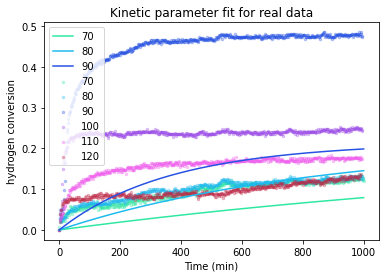

In [20]:
#with colors for paper
fin_sub = {'A1':1.1929e+11,'A2':7.5734e+10,'E1':92421.370,'E2':93717.2122}
colors = ['#2DE8A0','#1EBAEE','#2652E3','#9C4CE8','#F05BEE','#BF2947']
i = 0
for T in Ts:
    mock_run = get_lines(T,fin_sub)
    plt.plot(convs.iloc[:,0][:len(mock_run[0])],((mock_run[2]+mock_run[3])/(mock_run[0] + mock_run[2] + mock_run[3]*2)), label = (T-273), color = colors[i])
    i+=1
plt.scatter(convs.iloc[:,0],convs.iloc[:,1], label = '70', s = 6,alpha=0.3, color = colors[0])
plt.scatter(convs.iloc[:,0],convs.iloc[:,2], label = '80', s = 6,alpha=0.3, color = colors[1])
plt.scatter(convs.iloc[:,0],convs.iloc[:,3], label = '90', s = 6,alpha=0.3, color = colors[2])
plt.scatter(convs.iloc[:,0],convs.iloc[:,4], label = '100', s = 6,alpha=0.3, color = colors[3])
plt.scatter(convs.iloc[:,0],convs.iloc[:,5], label = '110', s = 6,alpha=0.3, color = colors[4])
plt.scatter(convs.iloc[:,0],convs.iloc[:,6], label = '120', s = 6,alpha=0.3, color = colors[5])
plt.legend()
plt.title('Kinetic parameter fit for real data')
plt.xlabel('Time (min)')
plt.ylabel('hydrogen conversion')
# plt.savefig("C:/Users/natha/OneDrive/Documenten/uni/uni documenten/MEP/MEP_figures/paper/real_data_kin_plot.svg",dpi=300)